# **Lecture 6 -- exercises -logistical regression**
- **Understand the code**
- **Write a short report**

### 1， Download the dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### 2, Show the images and lables

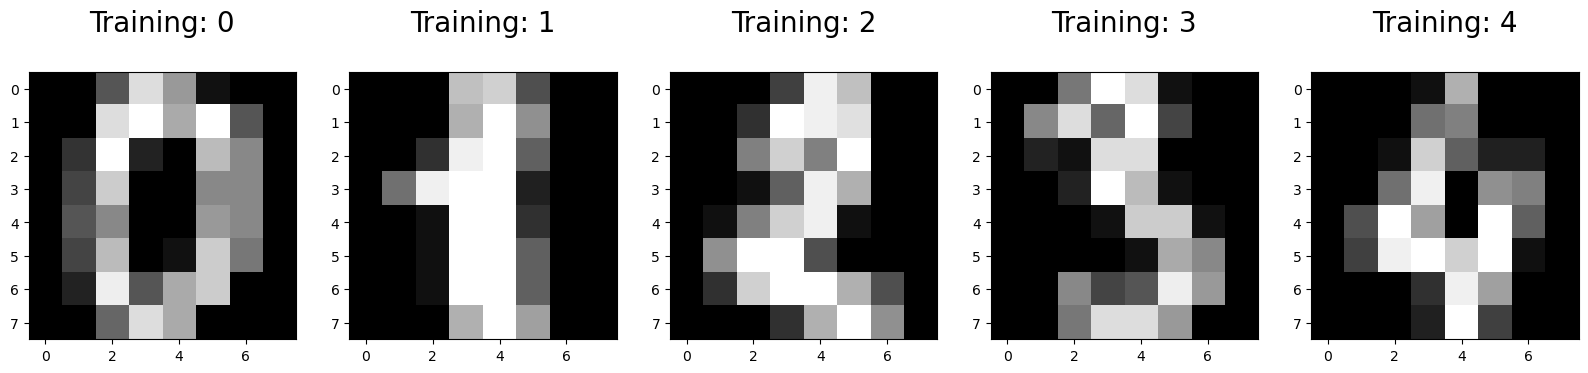

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

### 3, Preprocessing the dataset: train and test

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

## 4, We prepare 4 steps for the  regression
### 4.1, Import the model

In [4]:
from sklearn.linear_model import LogisticRegression

### 4.2, Make an instance of the Model

In [5]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

### 4.3, Training the model on the data

In [10]:
logisticRegr.fit(x_train, y_train)

C:\Users\wengang\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 4.4, Predict labels for new data (new images)

In [11]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

logisticRegr.predict(x_test[0:10])

predictions = logisticRegr.predict(x_test)

In [12]:
# Measure the performance
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


**Different visualization method to show the results**
- Seaborne
- Matplotlib

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


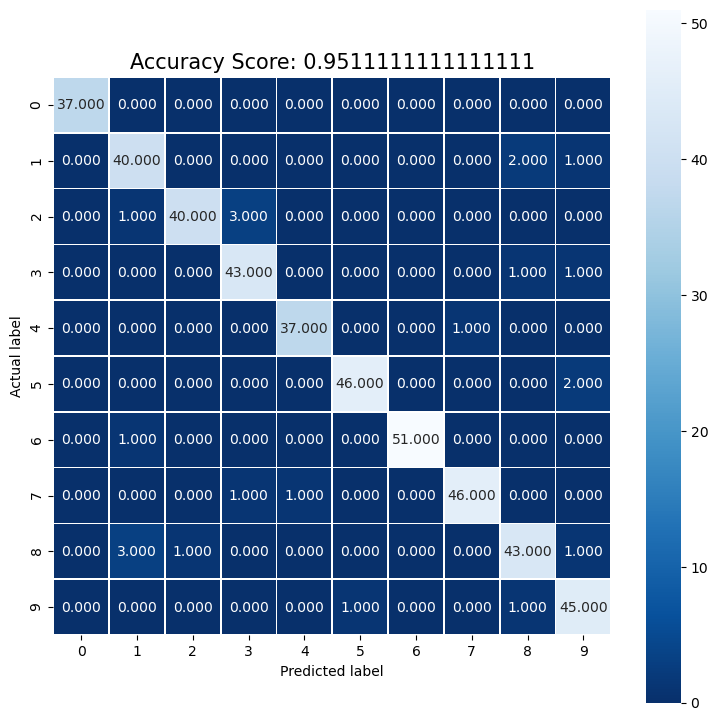

In [14]:
# By the seaborn method
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

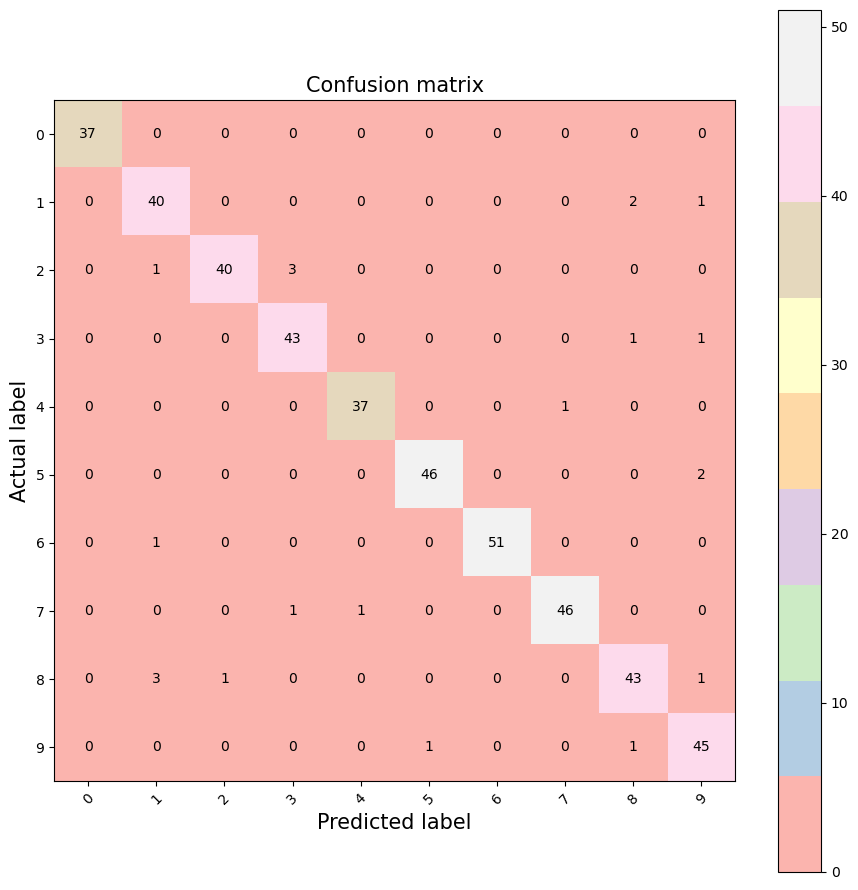

In [16]:
# By the Matplotlib method
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

# PART II: working on the real ditial dataset

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## II.1, Download the MNIST dataset

In [24]:
from sklearn.datasets import fetch_openml
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
#print(X.shape, y.shape)
mnist = fetch_openml("mnist_784")
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)


(70000, 784) (70000,)


## II.2, split the dataset into training and testing

In [31]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

## II.3  show the images and lables of the MNIST data

In [124]:
train_lbl[0:5]

28926    7
9080     3
52804    0
28094    1
46585    2
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

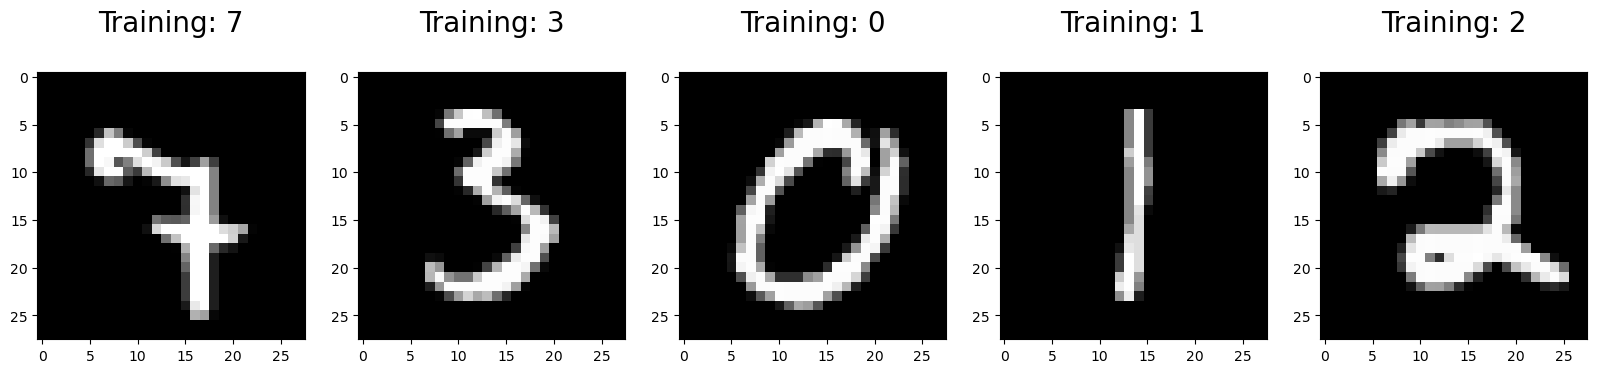

In [130]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5].values, train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % int(label), fontsize = 20)
    #plt.title(['Training: ', label], fontsize = 20)

## II.4, Four-step modelling by sklearn
### 4.1, Import the ML/Regression model

In [131]:
from sklearn.linear_model import LogisticRegression

### 4.2, make an instance of the chosen model

In [134]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
#logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr = LogisticRegression(penalty='l2',solver = 'newton-cholesky', max_iter=300)
 

### 4.3, train the model from the training dataset

In [135]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=300, solver='newton-cholesky')

### 4.4, Predict the labels of new data (new images)

In [170]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:1])  #.values.reshape(1,-1))

array(['0'], dtype=object)

In [171]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [172]:
#Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

## II.5, Measuring Model Performance (MNIST)

In [173]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9083


***Display Misclassified images with Predicted Labels (MNIST)***

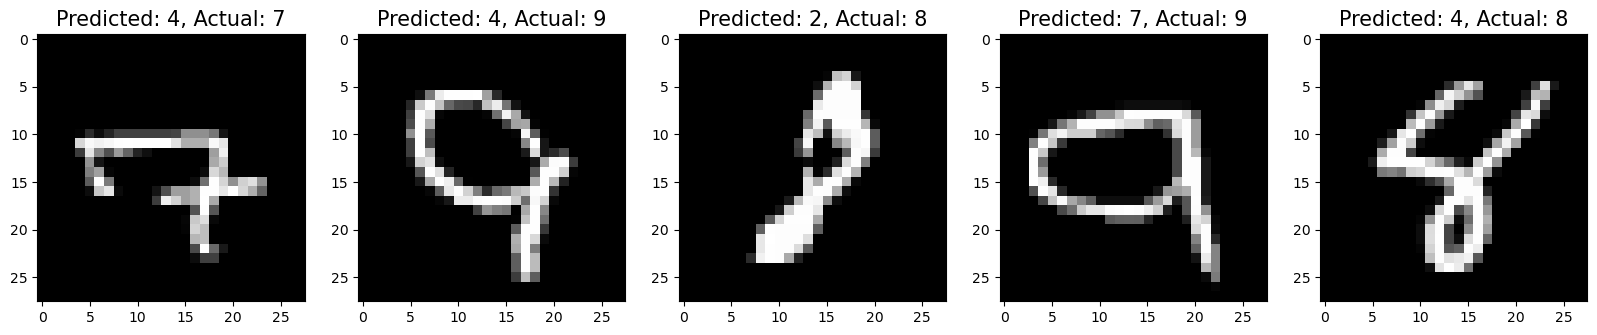

In [176]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label > predict:
        #print(label, predict)
        misclassifiedIndexes.append(index)
    index +=1
    
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img.iloc[badIndex].values, (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl.iloc[badIndex]), fontsize = 15)